## Exploratory Data Analysis


##### Author: Haleigh Tomlin
##### Date: 6/21/2021

In [1]:
#start working with the smaller dataset
#departments, agencies
#look into the project titles? Ask for guidance if needed
#focus on agency, department, FY, project start year, budget start year, total cost, subproject cost.  Also, which projects have a keyword list? Broken down by agency?

In [3]:
#loading packages
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

In [4]:
#smaller dataset
d = pd.read_pickle("../../data/dspg21RnD/smaller-final-dataset.pkl")

In [5]:
d["PROJECT_START_YEAR"] = d["PROJECT_START_DATE"].str[-4:]

In [6]:
d["PROJECT_START_YEAR"] = d.PROJECT_START_YEAR.astype(int)

In [7]:
d["BUDGET_START_YEAR"] = d["BUDGET_START_DATE"].str[-4:]

In [7]:
#d["BUDGET_START_YEAR"] = d.BUDGET_START_YEAR.astype(int)

In [8]:
#np.unique(d["BUDGET_START_YEAR"])

In [9]:
d.head()

,original index,PROJECT_ID,ABSTRACT,FY,PROJECT_TERMS,PROJECT_TITLE,DEPARTMENT,AGENCY,IC_CENTER,PROJECT_NUMBER,...,CFDA_CODE,FY.y,FY_TOTAL_COST,FY_TOTAL_COST_SUB_PROJECTS,ORG_COUNT,PI_COUNT,nchar,final_frqwds_removed,PROJECT_START_YEAR,BUDGET_START_YEAR
0,17608,152242,The multiprotein complex y-secretase proteolyt...,2008,Active Sites; Affect; Alzheimer's Disease; Amy...,STRUCTURE OF SIGNAL PEPTIDE PEPTIDASE,HHS,NIH,NaN,5F32AG027647-03,...,93.866,2008,3483.0,NaN,1,1,1402,"[multiprotein, y_secretase, proteolytically_cl...",2005,NaN
1,111864,190316,DESCRIPTION (provided by applicant): The Kis...,2008,Affect; Animal Model; Axon; Behavior; Behavior...,ROLE OF KISS1 NEURONS IN THE SEASONAL AND CIRC...,HHS,NIH,NaN,5K99HD056157-02,...,93.865,2008,39175.0,NaN,1,1,2553,"[kissl, gene, encode, peptide, kisspeptin, bin...",2007,NaN
2,22052,154213,DESCRIPTION (provided by applicant): The objec...,2008,Agreement; Antibodies; base; Binding; Biochemi...,CARBONIC ANHYDRASE AS A MODEL TO UNDERSTAND DI...,HHS,NIH,NaN,5F32GM076971-02,...,93.859,2008,49646.0,NaN,1,1,1414,"[biophysical, basis, thermodynamics_kinetic, m...",2007,NaN
3,35004,159362,Obesity is the cause of many adverse pregnancy...,2008,African; Analysis of Variance; Asians; Birth; ...,OBESITY ON VAGAL TONE AND HBA1C DURING PREGNANCY,HHS,NIH,NaN,5F31NR009611-03,...,93.361,2008,20406.0,NaN,1,1,1545,"[obesity, adverse_pregnancyoutcome, great, hea...",2006,NaN
4,371628,594482,Local potato advisory groups have expressed in...,2010,cost; Health; interest; Manure; Parasitic nema...,PLANT-PARASITIC NEMATODE MANAGEMENT AS A COMPO...,USDA,NIFA,NaN,0219605,...,10.203,2010,NaN,NaN,1,1,271,"[local, potato, advisory, express, interest, m...",2009,NaN


### potentials for EDA:

#what is the avg total cost within the departments/agencies?
#when did most of these projects occur?
#what do IC_Center, ORG_Count, PI_count mean?

visualization of total cost

Below, are the unique department and agency names.

In [10]:
np.unique(d["DEPARTMENT"])

array(['DOD', 'ED', 'EPA', 'HHS', 'NASA', 'NSF', 'USDA', 'VA'],
      dtype=object)

In [11]:
np.unique(d["AGENCY"])

array(['ACF', 'AHRQ', 'ALLCDC', 'ARS', 'CCCRP', 'CDMRP', 'CNRM', 'DVBIC',
       'EPA', 'FDA', 'FS', 'IES', 'NASA', 'NIDILRR', 'NIFA', 'NIH', 'NSF',
       'VA'], dtype=object)

Now, within each agency and department, I show the averages of the other variables. Specifically, we want to pay attention to the total cost,
cost of the sub-projects, and the project start year.

In [12]:
d.groupby("AGENCY").mean()

,original index,FY_TOTAL_COST,FY_TOTAL_COST_SUB_PROJECTS,ORG_COUNT,PI_COUNT,nchar,PROJECT_START_YEAR
AGENCY,,,,,,,
ACF,853257.848057,7.067602e+05,NaN,1.000000,1.000000,1485.003534,2014.869258
AHRQ,601049.386637,2.126629e+05,NaN,1.030303,1.024096,2785.456371,2012.204819
ALLCDC,540815.652510,4.907351e+05,NaN,1.012548,1.079472,2604.171493,2011.165701
ARS,836016.502278,1.440187e+06,NaN,0.738987,0.989873,2061.058228,2013.519494
CCCRP,739925.181818,4.435069e+06,NaN,1.000000,1.000000,1450.227273,2013.727273
CDMRP,655746.114974,8.620356e+05,NaN,1.052153,1.098512,4138.222705,2014.163703
CNRM,409094.503817,4.582450e+05,NaN,1.000000,1.000000,2950.564885,2011.641221
DVBIC,462909.191919,NaN,NaN,1.000000,1.000000,920.404040,2010.434343
EPA,498730.895455,4.647089e+05,NaN,1.000000,1.000000,1248.385714,2011.661688


In [13]:
d.groupby("DEPARTMENT").mean()

,original index,FY_TOTAL_COST,FY_TOTAL_COST_SUB_PROJECTS,ORG_COUNT,PI_COUNT,nchar,PROJECT_START_YEAR
DEPARTMENT,,,,,,,
DOD,649429.954748,862203.117588,NaN,1.050478,1.095347,4070.245252,2014.073295
ED,917320.553855,502548.429792,NaN,1.010204,1.000000,1809.257937,2015.638322
EPA,498730.895455,464708.870697,NaN,1.000000,1.000000,1248.385714,2011.661688
HHS,567590.883276,490633.598561,297573.30651,1.022190,1.016507,2508.457045,2010.728339
NASA,446629.285727,254419.485095,NaN,1.001014,1.001935,339.732332,2011.592463
NSF,572607.098498,349334.521462,NaN,1.113582,1.112161,2365.800440,2012.849669
USDA,566940.586617,684804.474285,NaN,0.965367,0.999731,1750.539051,2011.704894
VA,733560.005969,NaN,NaN,1.019895,1.013384,3347.116658,2013.268765


In [14]:
d.groupby("FY").mean()

,original index,FY_TOTAL_COST,FY_TOTAL_COST_SUB_PROJECTS,ORG_COUNT,PI_COUNT,nchar,PROJECT_START_YEAR
FY,,,,,,,
2008,1.028416e+05,423918.452992,1.000000,1.025650,1.017847,2098.789039,2006.147423
2009,2.137766e+05,431464.490479,1.000000,1.031562,1.025514,2264.243499,2007.611521
2010,2.953528e+05,480739.665816,1.000000,1.036724,1.031922,2352.820741,2008.471584
2011,3.599038e+05,425483.152243,1.000000,1.036140,1.029870,2475.111554,2009.023442
2012,4.742546e+05,412370.169179,276732.671808,1.026543,1.024086,2656.806867,2009.253159
2013,5.546263e+05,413069.835734,1.000000,1.041646,1.035364,2423.135746,2010.807562
2014,6.749725e+05,1.000000,1.000000,1.043051,1.041137,2414.647348,2012.018556
2015,7.635357e+05,443802.812706,291808.757222,1.051488,1.042651,2437.565159,2013.337385
2016,8.453971e+05,477405.951462,294400.533428,1.052611,1.048406,2486.625500,2014.358644


most were started about 2 years before their fiscal year


Next, I want to see which projects have a keyword list (project_terms), and then break that down between agencies.

In [10]:
d["PROJECT_TERMS"].isna().sum()

1894

In [14]:
d["PROJECT_TERMS"].isna().groupby(d["AGENCY"]).sum()

AGENCY
ACF           0
AHRQ          0
ALLCDC        0
ARS           0
CCCRP         0
CDMRP         0
CNRM          0
DVBIC         0
EPA           0
FDA           0
FS            0
IES           0
NASA          5
NIDILRR       0
NIFA          0
NIH        1889
NSF           0
VA            0
Name: PROJECT_TERMS, dtype: int64

Out of all the projects (in the smaller dataset), only 1,894 don't have the project terms. Almost all of these are within the NIH, actually. 5 are from NASA. I could make this into a bar chart of NA values but that may be a boring one, we should just report on it



In [19]:
#fig, ax = plt.subplots()
#ax.bar(d["AGENCY"], d["PROJECT_TERMS"].isna().groupby(d["AGENCY"]).sum())
#ax.set_xlabel("Agency")
#ax.set_ylabel("Project without keyword lists")
#fig.set_figheight(10)
#fig.set_figwidth(15)
#plt.show()

In [23]:
d["PROJECT_ID"].groupby(d["AGENCY"]).count() # I want to see how many there are in NIH

AGENCY
ACF           283
AHRQ         2739
ALLCDC       3108
ARS          3950
CCCRP          22
CDMRP        7593
CNRM          131
DVBIC          99
EPA          1540
FDA          1558
FS            194
IES          1764
NASA        10853
NIDILRR       810
NIFA        25625
NIH        503298
NSF        121718
VA           5529
Name: PROJECT_ID, dtype: int64

so, there are 503,298 in NIH in the smaller dataset.  If only ~2k have missing values, this seems ok.  There are also by far the most abstracts from NIH it seems, so the ones we have less for we have the project terms for all of them.

In [24]:
d["FY_TOTAL_COST"].isna().sum()

217197

In [25]:
d["FY_TOTAL_COST"].isna().groupby(d["AGENCY"]).sum()

AGENCY
ACF            35
AHRQ         2585
ALLCDC        225
ARS          1583
CCCRP           8
CDMRP         780
CNRM           10
DVBIC          99
EPA           349
FDA           147
FS             19
IES           126
NASA         1259
NIDILRR        63
NIFA        16598
NIH        177353
NSF         10429
VA           5529
Name: FY_TOTAL_COST, dtype: int64

Ok so quite a lot more have missing values for the total cost.  Breaking it down by Agency all of them have some NAs, but NIH has the most by far, and again, we have the most abstracts from NIH

In [26]:
d["FY_TOTAL_COST_SUB_PROJECTS"].isna().sum()

629351

In [27]:
d["FY_TOTAL_COST_SUB_PROJECTS"].isna().groupby(d["AGENCY"]).sum()

AGENCY
ACF           283
AHRQ         2739
ALLCDC       3108
ARS          3950
CCCRP          22
CDMRP        7593
CNRM          131
DVBIC          99
EPA          1540
FDA          1558
FS            194
IES          1764
NASA        10853
NIDILRR       810
NIFA        25625
NIH        441835
NSF        121718
VA           5529
Name: FY_TOTAL_COST_SUB_PROJECTS, dtype: int64

In [15]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 690814 entries, 0 to 690854
Data columns (total 33 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   original index              690814 non-null  int64  
 1   PROJECT_ID                  690814 non-null  object 
 2   ABSTRACT                    690814 non-null  object 
 3   FY                          690814 non-null  object 
 4   PROJECT_TERMS               688920 non-null  object 
 5   PROJECT_TITLE               690814 non-null  object 
 6   DEPARTMENT                  690814 non-null  object 
 7   AGENCY                      690814 non-null  object 
 8   IC_CENTER                   289225 non-null  object 
 9   PROJECT_NUMBER              690814 non-null  object 
 10  PROJECT_START_DATE          690814 non-null  object 
 11  PROJECT_END_DATE            690814 non-null  object 
 12  CONTACT_PI_PROJECT_LEADER   690773 non-null  object 
 13  OTHER_PIS     

The variables we want to focus on for the time being are agency, department, fiscal year, project start year, budget start year, total cost, subproject cost, and which projects have a keyword list (by agency).  In total, there are 690,814 observations, and all of them have abstract data.  Of those, 688,920 have keyword lists (so, less than 2k don't have keywords). We have fiscal years and project start years for all of our abstracts.  For the total cost of the projects, we only have 473,617 values, which means that we have the cost for almost 70% of our projects. Of those projects which we have a total cost, we have the budget start date for 258,154, just over half of them (54%). We have the cost of 61,463 (9%) of subprojects.  


Below, I show the distribution of projects in each fiscal year 2008-2019, followed by the distribution of project start years.

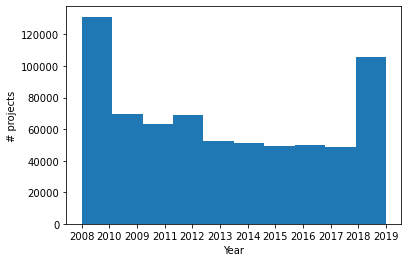

In [16]:
fig, ax = plt.subplots()
ax.hist(d["FY"])
ax.set_xlabel("Year")
ax.set_ylabel("# projects")
plt.show()

In [17]:
np.unique(d["PROJECT_START_YEAR"])

array([1965, 1970, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [18]:
d.dtypes

original index                  int64
PROJECT_ID                     object
ABSTRACT                       object
FY                             object
PROJECT_TERMS                  object
PROJECT_TITLE                  object
DEPARTMENT                     object
AGENCY                         object
IC_CENTER                      object
PROJECT_NUMBER                 object
PROJECT_START_DATE             object
PROJECT_END_DATE               object
CONTACT_PI_PROJECT_LEADER      object
OTHER_PIS                      object
CONGRESSIONAL_DISTRICT         object
DUNS_NUMBER                    object
ORGANIZATION_NAME              object
ORGANIZATION_CITY              object
ORGANIZATION_STATE             object
ORGANIZATION_ZIP               object
ORGANIZATION_COUNTRY           object
BUDGET_START_DATE              object
BUDGET_END_DATE                object
CFDA_CODE                      object
FY.y                           object
FY_TOTAL_COST                 float64
FY_TOTAL_COS

<ipython-input-19-c305f0f6f8b6>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(d["PROJECT_START_YEAR"], rotation = 90)


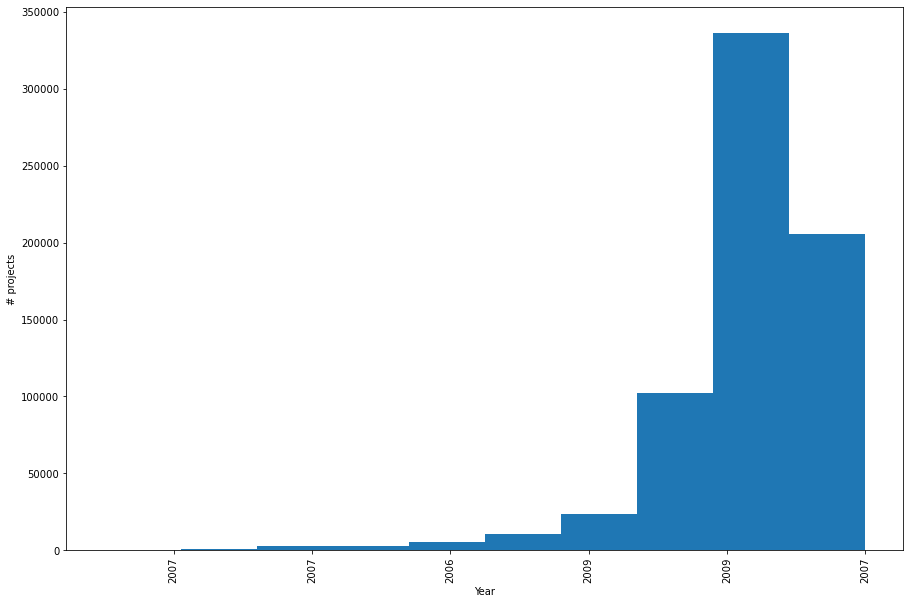

In [19]:
fig, ax = plt.subplots()
ax.hist(d["PROJECT_START_YEAR"])
ax.set_xlabel("Year")
ax.set_xticklabels(d["PROJECT_START_YEAR"], rotation = 90)
ax.set_ylabel("# projects")
fig.set_figheight(10)
fig.set_figwidth(15)
plt.show()

TypeError: the dtypes of parameters x (object) and width (float64) are incompatible

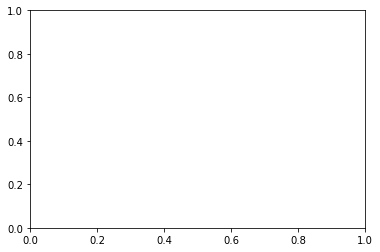

In [20]:
fig, ax = plt.subplots()
ax.bar(d["BUDGET_START_YEAR"], d["FY_TOTAL_COST"])
ax.set_xlabel("Year")
ax.set_xticklabels(d["PROJECT_START_YEAR"], rotation = 90)
ax.set_ylabel("# projects")
fig.set_figheight(10)
fig.set_figwidth(15)
plt.show()

d["PROJECT_START_YEAR"].mean()

In [21]:
d["PROJECT_START_YEAR"].median()

2012.0

^^ why is that not going back to 1965? And why are there repeats?

In [22]:
d["FY_TOTAL_COST"].isna().sum()

217197

In [23]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 690814 entries, 0 to 690854
Data columns (total 33 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   original index              690814 non-null  int64  
 1   PROJECT_ID                  690814 non-null  object 
 2   ABSTRACT                    690814 non-null  object 
 3   FY                          690814 non-null  object 
 4   PROJECT_TERMS               688920 non-null  object 
 5   PROJECT_TITLE               690814 non-null  object 
 6   DEPARTMENT                  690814 non-null  object 
 7   AGENCY                      690814 non-null  object 
 8   IC_CENTER                   289225 non-null  object 
 9   PROJECT_NUMBER              690814 non-null  object 
 10  PROJECT_START_DATE          690814 non-null  object 
 11  PROJECT_END_DATE            690814 non-null  object 
 12  CONTACT_PI_PROJECT_LEADER   690773 non-null  object 
 13  OTHER_PIS     

In [24]:
len(d["FY_TOTAL_COST"])

690814

In [25]:
690814-217197

473617

In [2]:
d["PROJECT_END_DATE"].isna().sum()

NameError: name 'd' is not defined

In [1]:
fig, ax = plt.subplots()
ax.bar(d["DEPARTMENT"], d["FY_TOTAL_COST"])
plt.show()

NameError: name 'plt' is not defined

then, do the same thing with the agencies!?  Can split this up by year, also

In [ ]:
fig, ax = plt.subplots()
ax.bar(d["DEPARTMENT"], d["FY_TOTAL_COST_SUB_PROJECTS"])
plt.show()

In [ ]:
np.unique(d["AGENCY"])

In [ ]:
fig, ax = plt.subplots()
ax.bar(d["AGENCY"], d["FY_TOTAL_COST"])
ax.set_xticklabels(d["AGENCY"], rotation = 90)
ax.set_ylabel("Total Cost (USD)")
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.bar(d["AGENCY"], d["FY_TOTAL_COST_SUB_PROJECTS"])
ax.set_xticklabels(d["AGENCY"], rotation = 90)
ax.set_ylabel("Total Cost (USD)")
plt.show()

In [ ]:
d.size

In [ ]:
d.shape